<font size=7>**Forest Cover Classification**</font>

<font size=5>**> Pulling and prepping the data**</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv(r'/media/abx05/DATA/datasets/dlsp-portfolio-starter-code/dlsp-portfolio-starter-code/cover_data.csv') 
df.head(7)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [4]:
df['class'].describe().transpose()

count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: class, dtype: float64

In [5]:
Counter(df['class'])

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

<font size=5>**Visualizing Data**</font>

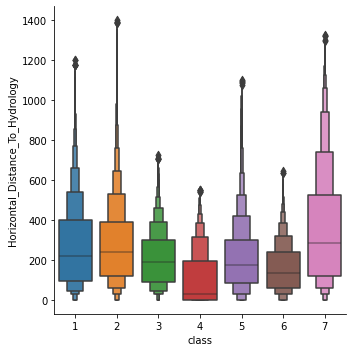

In [6]:
sns.catplot(y ='Horizontal_Distance_To_Hydrology',x= 'class',kind='boxen', data=df.sort_values('class'))

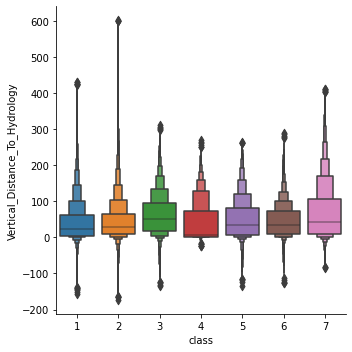

In [7]:
sns.catplot(y ='Vertical_Distance_To_Hydrology',x= 'class',kind='boxen', data=df.sort_values('class'))

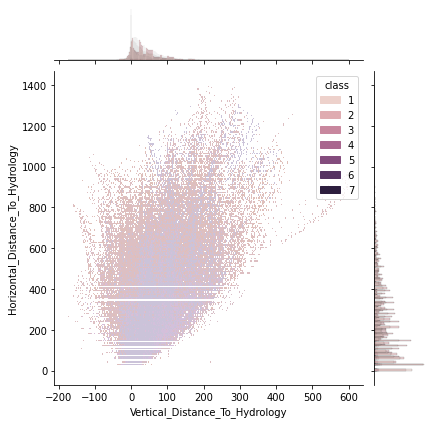

In [8]:
sns.jointplot(y = 'Horizontal_Distance_To_Hydrology', x='Vertical_Distance_To_Hydrology',hue = 'class',kind='hist',data=df.sort_values('class'))

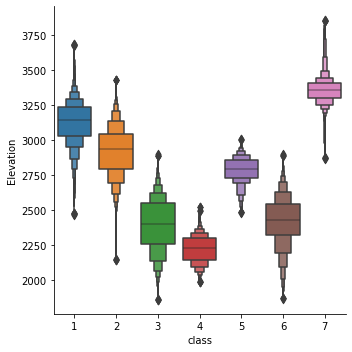

In [9]:
sns.catplot(y ='Elevation',x= 'class',kind='boxen', data=df.sort_values('class'))

<font size = 5>**Preprocessing Data**</font>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import to_categorical

2022-02-04 20:56:24.282384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-04 20:56:24.282449: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:
features = df.iloc[:,0:-1]
labels = df.iloc[:,-1]
col = features.iloc[:,0:9]

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: class, Length: 581012, dtype: int64

In [17]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.2)

In [24]:
ct = ColumnTransformer([("scale",StandardScaler(),col.columns)])

In [25]:
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [91]:
enc = LabelEncoder()
labels_train_enc = enc.fit_transform(labels_train.astype(str))
labels_test_enc = enc.transform(labels_test.astype(str))

In [92]:
labels_train_cat = to_categorical(labels_train_enc,dtype='int64')
labels_test_cat = to_categorical(labels_test_enc,dtype='int64')

<font size=5>**Classification Model**</font>

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [72]:
print(features_train_scaled.shape)
print(labels_train_cat.shape)

(464809, 9)
(464809, 7)


In [87]:
model = Sequential()
model.add(InputLayer(input_shape=(features_train_scaled.shape[1],)))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(7,activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0007), metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_70 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_71 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_73 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_75 (Dense)             (None, 7)               

In [89]:
EPOCHS = 300
BATCH_SIZE = 512
es = EarlyStopping(patience=25,monitor='val_accuracy',mode='auto',verbose=1)
model.fit(features_train_scaled,labels_train_cat,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_split=0.2,callbacks=[es])

Epoch 1/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5648 - accuracy: 0.7579 - val_loss: 0.5585 - val_accuracy: 0.7583
Epoch 2/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5531 - accuracy: 0.7630 - val_loss: 0.5514 - val_accuracy: 0.7632
Epoch 3/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5439 - accuracy: 0.7673 - val_loss: 0.5525 - val_accuracy: 0.7635
Epoch 4/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5361 - accuracy: 0.7700 - val_loss: 0.5498 - val_accuracy: 0.7652
Epoch 5/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5286 - accuracy: 0.7741 - val_loss: 0.5238 - val_accuracy: 0.7770
Epoch 6/300
727/727 [==============================] - 5s 6ms/step - loss: 0.5213 - accuracy: 0.7772 - val_loss: 0.5215 - val_accuracy: 0.7784
Epoch 7/300
727/727 [==============================] - 5s 7ms/step - loss: 0.5158 - accuracy: 0.7805 - val_loss: 0.5169 - val_accuracy: 0.7801

Epoch 58/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3925 - accuracy: 0.8357 - val_loss: 0.4307 - val_accuracy: 0.8199
Epoch 59/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3908 - accuracy: 0.8361 - val_loss: 0.4140 - val_accuracy: 0.8265
Epoch 60/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3882 - accuracy: 0.8374 - val_loss: 0.4182 - val_accuracy: 0.8270
Epoch 61/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3896 - accuracy: 0.8368 - val_loss: 0.4130 - val_accuracy: 0.8282
Epoch 62/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3875 - accuracy: 0.8379 - val_loss: 0.4103 - val_accuracy: 0.8301
Epoch 63/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3852 - accuracy: 0.8394 - val_loss: 0.4094 - val_accuracy: 0.8314
Epoch 64/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3856 - accuracy: 0.8388 - val_loss: 0.4059 - val_accuracy:

Epoch 115/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3451 - accuracy: 0.8565 - val_loss: 0.3773 - val_accuracy: 0.8452
Epoch 116/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3431 - accuracy: 0.8572 - val_loss: 0.3878 - val_accuracy: 0.8405
Epoch 117/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3438 - accuracy: 0.8574 - val_loss: 0.3860 - val_accuracy: 0.8409
Epoch 118/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3414 - accuracy: 0.8582 - val_loss: 0.3836 - val_accuracy: 0.8403
Epoch 119/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3424 - accuracy: 0.8574 - val_loss: 0.3809 - val_accuracy: 0.8451
Epoch 120/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3401 - accuracy: 0.8587 - val_loss: 0.3787 - val_accuracy: 0.8448
Epoch 121/300
727/727 [==============================] - 5s 7ms/step - loss: 0.3398 - accuracy: 0.8588 - val_loss: 0.3802 - val_ac

727/727 [==============================] - 5s 7ms/step - loss: 0.3161 - accuracy: 0.8695 - val_loss: 0.3643 - val_accuracy: 0.8506
Epoch 172/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3166 - accuracy: 0.8692 - val_loss: 0.3676 - val_accuracy: 0.8512
Epoch 173/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3176 - accuracy: 0.8690 - val_loss: 0.3562 - val_accuracy: 0.8560
Epoch 174/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3170 - accuracy: 0.8688 - val_loss: 0.3723 - val_accuracy: 0.8492
Epoch 175/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3169 - accuracy: 0.8691 - val_loss: 0.3593 - val_accuracy: 0.8532
Epoch 176/300
727/727 [==============================] - 4s 6ms/step - loss: 0.3156 - accuracy: 0.8698 - val_loss: 0.3653 - val_accuracy: 0.8515
Epoch 177/300
727/727 [==============================] - 5s 6ms/step - loss: 0.3161 - accuracy: 0.8694 - val_loss: 0.3573 - val_accuracy: 0.8541

727/727 [==============================] - 5s 6ms/step - loss: 0.3004 - accuracy: 0.8764 - val_loss: 0.3643 - val_accuracy: 0.8533
Epoch 228/300
727/727 [==============================] - 5s 6ms/step - loss: 0.2990 - accuracy: 0.8775 - val_loss: 0.3477 - val_accuracy: 0.8595
Epoch 229/300
727/727 [==============================] - 5s 6ms/step - loss: 0.2995 - accuracy: 0.8769 - val_loss: 0.3579 - val_accuracy: 0.8547
Epoch 230/300
727/727 [==============================] - 5s 6ms/step - loss: 0.2977 - accuracy: 0.8776 - val_loss: 0.3545 - val_accuracy: 0.8573
Epoch 231/300
727/727 [==============================] - 5s 6ms/step - loss: 0.2983 - accuracy: 0.8775 - val_loss: 0.3668 - val_accuracy: 0.8513
Epoch 232/300
727/727 [==============================] - 4s 6ms/step - loss: 0.2989 - accuracy: 0.8769 - val_loss: 0.3471 - val_accuracy: 0.8597
Epoch 233/300
727/727 [==============================] - 4s 6ms/step - loss: 0.2973 - accuracy: 0.8777 - val_loss: 0.3508 - val_accuracy: 0.8588

In [93]:
model.evaluate(features_test_scaled,labels_test_cat)

3632/3632 [==============================] - 6s 2ms/step - loss: 0.3450 - accuracy: 0.8605


[0.3449755907058716, 0.8605199456214905]

In [97]:
estimates = model.predict(features_test_scaled)
est_val= np.argmax(estimates,axis=1)
true_val = np.argmax(labels_test_cat,axis=1)
print(classification_report(true_val,est_val))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     42506
           1       0.89      0.87      0.88     56705
           2       0.86      0.81      0.83      6915
           3       0.74      0.77      0.76       526
           4       0.72      0.64      0.68      1884
           5       0.70      0.76      0.72      3491
           6       0.85      0.89      0.87      4176

    accuracy                           0.86    116203
   macro avg       0.80      0.80      0.80    116203
weighted avg       0.86      0.86      0.86    116203

